## Machine learning 

### Trying classical ML models to predict epilepsy from 5s EEG segments 


In [1]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [12]:
df = pd.read_csv("eeg_features_updated.csv")
display(df.head())
display(df.shape)

,epoch,subject_id,age,gender,epilepsy,EEG_F7-REF_mean,EEG_F7-REF_var,EEG_F7-REF_skew,EEG_F7-REF_kurtosis,EEG_F7-REF_zcr,...,EEG_CZ-REF_D4_entropy,EEG_CZ-REF_D3_energy,EEG_CZ-REF_D3_var,EEG_CZ-REF_D3_entropy,EEG_CZ-REF_D2_energy,EEG_CZ-REF_D2_var,EEG_CZ-REF_D2_entropy,EEG_CZ-REF_D1_energy,EEG_CZ-REF_D1_var,EEG_CZ-REF_D1_entropy
0,259,aaaaakbt,55,F,1,0.000271,0.901103,0.050189,2.800283,0.036029,...,5.548613,13.069727,0.080648,6.149731,25.084957,0.079126,7.700588,16.449905,0.026194,8.848152
1,91,aaaaakbt,55,F,1,0.007570,0.545318,0.030426,3.839013,0.072858,...,5.494153,13.798444,0.084993,6.299136,25.621226,0.080819,7.703578,16.690660,0.026577,8.831782
2,179,aaaaakbt,55,F,1,0.019787,1.514401,0.207039,2.199967,0.032026,...,4.926360,15.435842,0.095282,6.209708,29.196502,0.092029,7.767811,20.033641,0.031901,8.840090
3,31,aaaaakbt,55,F,1,-0.012618,2.465473,0.470879,2.859472,0.028022,...,4.801502,13.588945,0.083217,6.303313,3.792793,0.011964,7.154077,0.160961,0.000256,8.318352
4,353,aaaaakbt,55,F,1,0.050320,1.623156,0.145359,2.806115,0.031225,...,5.274940,12.869191,0.079424,6.256647,26.296179,0.082914,7.739563,17.784344,0.028319,8.831584


(200, 145)

In [3]:
df.describe()

,epoch,age,epilepsy,EEG_F7-REF_mean,EEG_F7-REF_var,EEG_F7-REF_skew,EEG_F7-REF_kurtosis,EEG_F7-REF_zcr,EEG_F7-REF_tkeo,EEG_F7-REF_delta_power,...,EEG_CZ-REF_D4_entropy,EEG_CZ-REF_D3_energy,EEG_CZ-REF_D3_var,EEG_CZ-REF_D3_entropy,EEG_CZ-REF_D2_energy,EEG_CZ-REF_D2_var,EEG_CZ-REF_D2_entropy,EEG_CZ-REF_D1_energy,EEG_CZ-REF_D1_var,EEG_CZ-REF_D1_entropy
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,...,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,8.800000e+02,880.000000
mean,135.255682,54.795455,0.545455,0.000367,0.824129,-0.024239,4.089274,0.099811,0.167225,0.349834,...,5.145229,124.828404,0.768396,6.090460,45.547213,0.143677,7.093623,3.203387,5.100922e-03,8.105838
std,91.370886,16.873456,0.498213,0.016574,2.703299,0.507660,6.640307,0.048117,0.443554,0.171053,...,0.377840,155.559154,0.957056,0.483387,94.841201,0.299169,0.514328,10.929277,1.740324e-02,0.532592
min,0.000000,17.000000,0.000000,-0.079664,0.000231,-5.601578,1.529586,0.013611,0.000013,0.001379,...,1.183936,0.002347,0.000014,0.674322,0.000983,0.000003,1.322034,0.000054,8.559170e-08,2.118547
25%,57.000000,45.750000,0.000000,-0.007095,0.226429,-0.185690,2.972083,0.070256,0.021828,0.219211,...,5.060854,11.951032,0.073193,6.060251,2.676663,0.008443,7.080370,0.099961,1.591727e-04,8.112093
50%,125.000000,54.000000,1.000000,0.000189,0.674204,-0.014829,3.261489,0.091273,0.078070,0.337210,...,5.218572,81.500152,0.502118,6.192339,17.809374,0.056180,7.191965,0.636812,1.014032e-03,8.199034
75%,209.000000,69.000000,1.000000,0.007086,1.032303,0.146818,3.817740,0.120897,0.168906,0.472217,...,5.337875,178.514544,1.099747,6.294167,47.987019,0.151378,7.280326,1.886987,3.004748e-03,8.257780
max,495.000000,88.000000,1.000000,0.083261,77.565541,4.148545,184.354433,0.479584,9.301333,0.798952,...,5.756356,1599.886838,9.852614,6.535968,1235.974341,3.898551,7.820930,163.536119,2.604064e-01,8.852808


In [13]:
# Check number of patients per class
df.groupby('epilepsy')['subject_id'].nunique()


epilepsy
0    5
1    5
Name: subject_id, dtype: int64

In [14]:
# check number of 5-sec EEG sessions per class
df.groupby('epilepsy')['epoch'].count()


epilepsy
0    100
1    100
Name: epoch, dtype: int64

Prepare the dataset for ML:
- Drop useless columns (ids, irrelevant for the model, etc)
- Separate labels from features (X, y)
- Train test split
- Sci-kit learn pre-processing: 
-> Standardize of numerical variables  
-> One-hot-encode of categorical variables

In [15]:
# Drop useless columns for the model
df = df.drop("epoch", axis=1)

# Define the target 
target_name = "epilepsy"

# Patient-level train/test split
""" Splitting by unique subject ID (and not simply by individual samples since multiple samples can come from the same patient) 
To guarantee that no data from the same patient appears in both train and test sets
This is critical to prevent patient-level leakage and evaluate generalization to new patients in clinical settings
"""

unique_ids = df['subject_id'].unique()
stratify_labels = df.drop_duplicates('subject_id')[target_name]

train_ids, test_ids = train_test_split(
    unique_ids, test_size=0.2, random_state=0, stratify=stratify_labels
)

## Train/test splits based on subject IDs
train_df = df[df['subject_id'].isin(train_ids)]
test_df  = df[df['subject_id'].isin(test_ids)]

## Separate features and labels
X_train, Y_train = train_df.drop(columns=target_name), train_df[target_name]
X_test, Y_test = test_df.drop(columns=target_name), test_df[target_name]


In [16]:
### Sci-kit Learn Preprocessing ###

## Drop patient IDs now
X_train = X_train.drop("subject_id", axis=1)
X_test = X_test.drop("subject_id", axis=1)

# Automatically detect names of numeric/categorical columns
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=object).columns.tolist()

# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
        ("scaler", StandardScaler())
    ])

# Create pipeline for categorical features
categorical_transformer = Pipeline(steps=[
        ("encoder",OneHotEncoder(drop="first"))
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Preprocessings on train set
X_train_transformed = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test_transformed = preprocessor.transform(X_test)


### Log model scores locally

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Initialize your tracking DataFrame
results_df = pd.DataFrame(columns=[
    "model_name", 
    "train_accuracy", "test_accuracy", 
    "train_f1", "test_f1", 
    "train_sensitivity", "test_sensitivity", 
    "train_specificity", "test_specificity"
])

def log_model_performance(model_name, y_train, y_train_pred, y_test, y_test_pred, results_df):
    def compute_metrics(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        sensitivity = recall_score(y_true, y_pred, pos_label=1)  # Recall for class 1
        specificity = recall_score(y_true, y_pred, pos_label=0)  # Recall for class 0
        return acc, f1, sensitivity, specificity

    train_metrics = compute_metrics(y_train, y_train_pred)
    test_metrics = compute_metrics(y_test, y_test_pred)

    # Append to results_df
    results_df = pd.concat([results_df, pd.DataFrame([{
        "model_name": model_name,
        "train_accuracy": train_metrics[0],
        "test_accuracy": test_metrics[0],
        "train_f1": train_metrics[1],
        "test_f1": test_metrics[1],
        "train_sensitivity": train_metrics[2],
        "test_sensitivity": test_metrics[2],
        "train_specificity": train_metrics[3],
        "test_specificity": test_metrics[3],
    }])], ignore_index=True)

    return results_df


### Baseline Model: Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Train logistic regression 
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_transformed, Y_train)

# Predict class labels
Y_train_pred = classifier.predict(X_train_transformed)
Y_test_pred = classifier.predict(X_test_transformed)

# Log performance
results_df = log_model_performance("LogReg_baseline", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)
results_df

/var/folders/g2/7q8py5px6xqbgjxm64g6_xcc0000gp/T/ipykernel_4036/290654043.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([{


,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,1.0,0.7,1.0,0.625,1.0,0.5,1.0,0.9


In [19]:
from sklearn.model_selection import cross_val_score
# Check the average score with a cross-validation (here using K=10)
scores = cross_val_score(classifier, X_train_transformed , Y_train, cv=10)
avg = scores.mean()
std = scores.std()

print(avg)
print(std)

0.8625
0.082915619758885


L2 regularization (Ridge) to address overfitting

In [22]:
# Train logistic regression with L1 reg
classifier_L2 = LogisticRegression(
    penalty='l1',           # Lasso regularization
    C=0.01,                  # Smaller C = stronger regularization
    solver='saga',         # or 'saga' for large data
    max_iter=1000,
    random_state=42,
)

classifier_L2.fit(X_train_transformed, Y_train)

# Predict class labels
Y_train_pred = classifier_L2.predict(X_train_transformed)
Y_test_pred = classifier_L2.predict(X_test_transformed)

# Log performance
results_df = log_model_performance("LogReg_L1regularization_balanced", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)

In [ ]:
# Perform grid search

from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.001, 0.01, 0.1, 0.5],       # Regularization strength
    "penalty": ["l1", "l2"],               # Type of regularization
    "solver": ["liblinear"],              # Solver that supports both l1 and l2
    "class_weight": ["balanced"]     # Handle class imbalance
}
gridsearch = GridSearchCV(classifier, param_grid = param_grid, cv = 3) 
gridsearch.fit(X_train_transformed, Y_train)

Y_train_pred = gridsearch.predict(X_train_transformed)
Y_test_pred = gridsearch.predict(X_test_transformed)

print("\n✅ Best Parameters:", gridsearch.best_params_)
print("Best CV F1-score :", gridsearch.best_score_)

results_df = log_model_performance("LogReg_GridSearch", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)


In [23]:
results_df

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,1.0000,0.7,1.000000,0.625000,1.00,0.5,1.000,0.9
1,LogReg_L1regularization_balanced,0.8875,0.6,0.894118,0.333333,0.95,0.2,0.825,1.0
2,LogReg_L1regularization_balanced,0.5000,0.5,0.000000,0.000000,0.00,0.0,1.000,1.0


### Results from logistic regression:
* Regularization did not reduce overfitting. 

* We will try reducing dimension as there are currently many features. 

* Then we will try alternative models that may be more suitable to capture non-linear patterns in EEG better.

### Dimension reduction to reduce overfitting: 
* SelectKBest
* PCA

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=50)
X_train_reduced = selector.fit_transform(X_train_transformed, Y_train)
X_test_reduced = selector.transform(X_test_transformed)


In [12]:
selected_features_df = pd.DataFrame({
    "feature": preprocessor.get_feature_names_out(),
    "f_score": selector.scores_
}).loc[selector.get_support()].sort_values("f_score", ascending=False)

print(selected_features_df)

                          feature      f_score
0                        num__age  4156.221147
65    num__EEG_T4-REF_alpha_power  1075.451436
63    num__EEG_T4-REF_delta_power  1053.049275
93    num__EEG_T6-REF_alpha_power   937.501215
7     num__EEG_F7-REF_delta_power   872.831187
91    num__EEG_T6-REF_delta_power   830.151152
9     num__EEG_F7-REF_alpha_power   727.152624
74         num__EEG_T4-REF_D4_var   718.195958
73      num__EEG_T4-REF_D4_energy   717.110564
12   num__EEG_F7-REF_samp_entropy   700.167766
35    num__EEG_T3-REF_delta_power   612.060781
61            num__EEG_T4-REF_zcr   609.860249
123   num__EEG_CZ-REF_gamma_power   608.620159
5             num__EEG_F7-REF_zcr   590.278196
37    num__EEG_T3-REF_alpha_power   579.345192
39    num__EEG_T3-REF_gamma_power   569.924572
102        num__EEG_T6-REF_D4_var   561.911491
101     num__EEG_T6-REF_D4_energy   561.453984
18         num__EEG_F7-REF_D4_var   547.244303
17      num__EEG_F7-REF_D4_energy   546.897503
67    num__EE

In [25]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

print(f"Reduced to {X_train_pca.shape[1]} components")
# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

Reduced to 32 components
Explained variance ratio: [0.25301277 0.12413083 0.10950633 0.09753322 0.04538    0.03997948
 0.02882184 0.02800861 0.02362122 0.01962987 0.01775575 0.01666533
 0.0143755  0.0137946  0.01234376 0.01048942 0.00993451 0.00954829
 0.00844971 0.00838734 0.00744635 0.00677971 0.00619402 0.00564245
 0.0051157  0.00504376 0.00455305 0.00439478 0.00406045 0.00372272
 0.0033708  0.00313627]


In [38]:
# 1. Create column names for PCA components
selected_feature_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
print("Selected PCA components:", selected_feature_cols)

# 2. Turn the PCA output into a DataFrame
pca_df = pd.DataFrame(X_test_pca, columns=selected_feature_cols)

# 3. Add PCA features to your segment-level DataFrame
segment_df = df.reset_index(drop=True)  # Just in case
segment_df = pd.concat([segment_df, pca_df], axis=1)

Selected PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32']


Try logistic regression again

In [27]:
# Train logistic regression again with L2 reg
classifier_2 = LogisticRegression()

classifier_2 .fit(X_train_pca, Y_train)

# Predict class labels
Y_train_pred = classifier_2.predict(X_train_pca)
Y_test_pred = classifier_2.predict(X_test_pca)

# Log performance
results_df = log_model_performance("LogReg_2_pca", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)
results_df

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,1.0000,0.70,1.000000,0.625000,1.0000,0.50,1.0000,0.90
1,LogReg_L1regularization_balanced,0.8875,0.60,0.894118,0.333333,0.9500,0.20,0.8250,1.00
2,LogReg_L1regularization_balanced,0.5000,0.50,0.000000,0.000000,0.0000,0.00,1.0000,1.00
3,LogReg_2_pca,0.5000,0.50,0.000000,0.000000,0.0000,0.00,1.0000,1.00
4,LogReg_2_pca,0.9750,0.65,0.975309,0.611111,0.9875,0.55,0.9625,0.75


In [31]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
import numpy as np

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) != 0 else 0

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',   # Sensitivity
    'f1': 'f1_macro',
    'specificity': make_scorer(specificity_score)
}

cv = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)

scores = cross_validate(
    classifier_2, 
    X_train_pca, 
    Y_train, 
    scoring=scoring, 
    cv=cv, 
    return_train_score=True
)

for metric in scores:
    if 'train_' in metric or 'test_' in metric:
        print(f"{metric}: Mean={scores[metric].mean():.4f}, Std={scores[metric].std():.4f}")



/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: 

test_accuracy: Mean=0.8717, Std=0.1609
train_accuracy: Mean=0.9747, Std=0.0046
test_precision: Mean=0.8483, Std=0.2331
train_precision: Mean=0.9750, Std=0.0046
test_recall: Mean=0.8650, Std=0.1817
train_recall: Mean=0.9747, Std=0.0046
test_f1: Mean=0.8347, Std=0.2228
train_f1: Mean=0.9747, Std=0.0046
test_specificity: Mean=0.8800, Std=0.2750
train_specificity: Mean=0.9663, Std=0.0071


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Results of regularization and reducing dimensions:
* Performance drops a bit but overfitting reduces 
* Sensitivity now : 0.83 (train) - 0.77 (test)
vs 
* Sensitivity at baseline : 0.91 (train) - 0.79 (test)

Now let's try other models since logistic regression does not look suitable.

### Confusion matrix and ROC curves

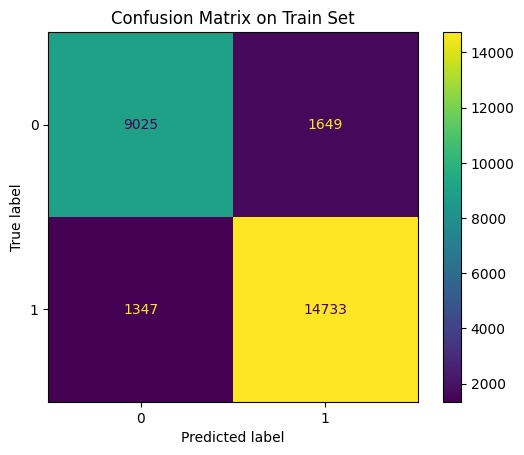

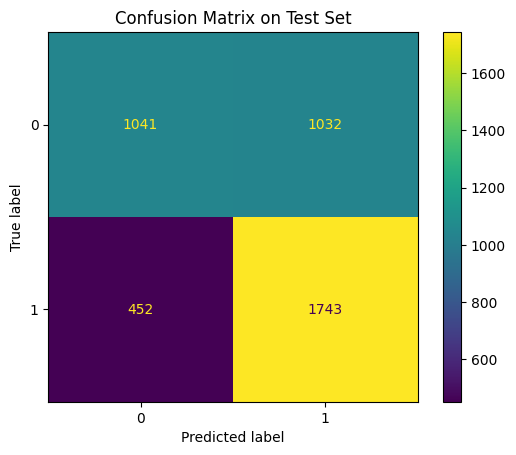

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# Confusion matrix on training set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Train Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_train_transformed, Y_train, ax=ax)
plt.show()

# Confusion matrix on test set
fig, ax = plt.subplots()
ax.set_title("Confusion Matrix on Test Set")
ConfusionMatrixDisplay.from_estimator(classifier, X_test_transformed, Y_test, ax=ax)
plt.show()


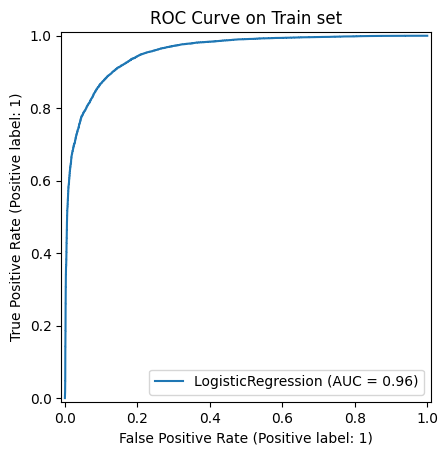

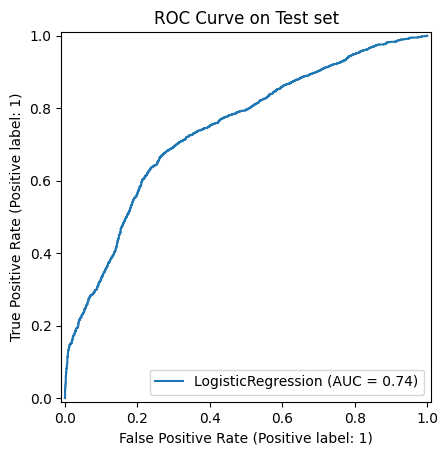

In [27]:
# Visualize ROC curves
_ , ax = plt.subplots() 
ax.set_title("ROC Curve on Train set") 
RocCurveDisplay.from_estimator(classifier, X_train_transformed, Y_train, ax=ax) 
plt.show()

_ , ax = plt.subplots() 
ax.set_title("ROC Curve on Test set") 
RocCurveDisplay.from_estimator(classifier, X_test_transformed, Y_test, ax=ax) 
plt.show()


In [7]:
!pip install xgboost
import sys
!{sys.executable} -m pip install xgboost

/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/bin/pip: line 2: /Users/soniahalhol/Jedha ML Engineering/Projects/9_Final_project/.venv/bin/python: No such file or directory
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/bin/pip: line 2: exec: /Users/soniahalhol/Jedha ML Engineering/Projects/9_Final_project/.venv/bin/python: cannot execute: No such file or directory
  Using cached xgboost-3.0.0-py3-none-macosx_10_15_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-macosx_10_15_x86_64.whl (2.2 MB)


### XGBoost

In [33]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier

# --- Custom specificity scorer ---
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]
    fp = cm[0, 1]
    return tn / (tn + fp) if (tn + fp) != 0 else 0

# --- Scoring dictionary for CV ---
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro', zero_division=0),
    'f1': make_scorer(f1_score, average='macro', zero_division=0),
    'specificity': make_scorer(specificity_score)
}

cv = StratifiedKFold(n_splits=75, shuffle=True, random_state=42)

# --- Cross-validation ---
xgb_cv = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
cv_scores = cross_validate(
    xgb_cv,
    X_train_pca,
    Y_train,
    scoring=scoring,
    cv=cv,
    return_train_score=True
)

# --- Log CV scores into results_df as "XGBoostCV" ---
results_df = pd.concat([results_df, pd.DataFrame([{
    "model_name": "XGBoostCV",
    "train_accuracy": cv_scores['train_accuracy'].mean(),
    "test_accuracy": cv_scores['test_accuracy'].mean(),
    "train_f1": cv_scores['train_f1'].mean(),
    "test_f1": cv_scores['test_f1'].mean(),
    "train_sensitivity": cv_scores['train_recall'].mean(),  # Recall for class 1
    "test_sensitivity": cv_scores['test_recall'].mean(),
    "train_specificity": cv_scores['train_specificity'].mean(),
    "test_specificity": cv_scores['test_specificity'].mean(),
}])], ignore_index=True)

# --- Train on full train set + predict ---
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train_pca, Y_train)

Y_train_pred = xgboost.predict(X_train_pca)
Y_test_pred = xgboost.predict(X_test_pca)

# --- Log actual predictions ---
results_df = log_model_performance("XGBoost_reduced", Y_train, Y_train_pred, Y_test, Y_test_pred, results_df)

# --- Final results ---
results_df



/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:45:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:45:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [12:45:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fo

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,1.0000,0.700000,1.000000,0.625000,1.0000,0.500000,1.0000,0.900000
1,LogReg_L1regularization_balanced,0.8875,0.600000,0.894118,0.333333,0.9500,0.200000,0.8250,1.000000
2,LogReg_L1regularization_balanced,0.5000,0.500000,0.000000,0.000000,0.0000,0.000000,1.0000,1.000000
3,LogReg_2_pca,0.5000,0.500000,0.000000,0.000000,0.0000,0.000000,1.0000,1.000000
4,LogReg_2_pca,0.9750,0.650000,0.975309,0.611111,0.9875,0.550000,0.9625,0.750000
5,XGBoostCV,1.0000,0.888333,1.000000,0.867333,1.0000,0.890000,1.0000,0.900000
6,XGBoost_reduced,1.0000,0.400000,1.000000,0.400000,1.0000,0.400000,1.0000,0.400000
7,XGBoostCV,1.0000,0.873333,1.000000,0.836444,1.0000,0.873333,1.0000,0.873333
8,XGBoost_reduced,1.0000,0.400000,1.000000,0.400000,1.0000,0.400000,1.0000,0.400000


In [ ]:
def aggregate_predictions_by_recording(model, segment_df, feature_cols, 
                                       id_col='subject_id', threshold=0.5, label_col='epilepsy'):
    """
    Aggregates 5s EEG segment-level predictions into recording-level predictions.

    Parameters:
    - model: Trained classifier with .predict_proba()
    - segment_df: DataFrame with 5s segments and associated metadata (e.g. subject_id, label)
    - feature_cols: List of EEG channel features used for prediction
    - id_col: Column name identifying each EEG recording (e.g., 'subject_id' or 'edf_path')
    - threshold: Probability threshold for binary classification
    - label_col: Name of ground-truth label column (default 'epilepsy')

    Returns:
    - agg_df: DataFrame with one row per EEG file, with:
        - subject_id / edf_path
        - number_of_segments
        - mean_probability
        - predicted_label
        - true_label
    """

    segment_df = segment_df.copy()

    # Get segment-level probabilities for class 1 (epilepsy)
    segment_df['prob_epilepsy'] = model.predict_proba(segment_df[feature_cols])[:, 1]

    # Group by EEG recording
    agg_results = []

    for recording_id, group in segment_df.groupby(id_col):
        probs = group['prob_epilepsy'].values
        mean_prob = probs.mean()
        pred_label = int(mean_prob >= threshold)

        record = {
            id_col: recording_id,
            'number_of_segments': len(probs),
            'mean_probability': mean_prob,
            'predicted_label': pred_label
        }

        # Add true label if available
        if label_col in group.columns:
            record['true_label'] = group[label_col].iloc[0]

        agg_results.append(record)

    return pd.DataFrame(agg_results)

In [41]:
cv = StratifiedKFold(n_splits=75, shuffle=True, random_state=42)

# After cross_validate(), train final model on full training data
xgb_final = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_final.fit(X_train_pca, Y_train)

selected_feature_cols = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
print("Selected PCA components:", selected_feature_cols)

agg_df = aggregate_predictions_by_recording(
    model=xgb_final,
    segment_df=segment_df,
    feature_cols=selected_feature_cols,
    id_col='subject_id',  # or 'edf_path' depending on how your data is structured
    threshold=0.5
)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
sensitivity = recall_score(agg_df['true_label'], agg_df['predicted_label'], pos_label=1)
specificity = recall_score(agg_df['true_label'], agg_df['predicted_label'], pos_label=0)

print(f"""
🎯 Recording-level Evaluation:
- Accuracy:    {accuracy_score(agg_df['true_label'], agg_df['predicted_label']):.4f}
- Sensitivity: {sensitivity:.4f}
- Specificity: {specificity:.4f}
""")


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/EEG_Epilepsy_Classification/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [13:08:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Selected PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32']

🎯 Recording-level Evaluation:
- Accuracy:    0.6000
- Sensitivity: 0.2000
- Specificity: 1.0000



Save model to MLFlow

In [1]:
import mlflow
import mlflow.sklearn
import os
from joblib import dump

from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 1. Define your run name and tracking URI
RUN_NAME = 'XGBoost_Patient_Level'
os.environ["APP_URI"] = 'https://zacbl-dsfs33-mlflow.hf.space'
EXPERIMENT_NAME = "Epilepsy_Classifiers"

# 2. Set up MLflow
mlflow.set_tracking_uri(os.environ["APP_URI"])
mlflow.set_experiment(EXPERIMENT_NAME)
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

# 3. Evaluate model on patient-level data
agg_df = aggregate_predictions_by_recording(
    model=xgb_final,
    segment_df=pca_df,  # DataFrame with PCA features added
    feature_cols=selected_feature_cols,
    id_col='subject_id',
    threshold=0.5
)

accuracy = accuracy_score(agg_df['true_label'], agg_df['predicted_label'])
sensitivity = recall_score(agg_df['true_label'], agg_df['predicted_label'], pos_label=1)
specificity = recall_score(agg_df['true_label'], agg_df['predicted_label'], pos_label=0)
f1 = f1_score(agg_df['true_label'], agg_df['predicted_label'])

# 4. Start MLflow run and log everything
with mlflow.start_run(experiment_id=experiment.experiment_id):
    mlflow.set_tag('mlflow.runName', RUN_NAME)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("sensitivity", sensitivity)
    mlflow.log_metric("specificity", specificity)
    mlflow.log_metric("f1_score", f1)

    # Log the model
    mlflow.sklearn.log_model(xgb_final, artifact_path="xgb_patient_model")

    # Optional: also save locally
    dump(xgb_final, "xgb_patient_model.joblib")


ModuleNotFoundError: No module named 'mlflow'

Gridsearch

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score

# Parameter grid
param_grid = {
    "max_depth": [3, 5, 7],
    "min_child_weight": [1, 3, 5],
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.7, 0.9],
}

# Grid search setup
grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    param_grid=param_grid,
    scoring=make_scorer(roc_auc_score),
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=1,
)

# Train model
grid.fit(X_train_reduced, Y_train)

# Predictions
Y_train_pred = grid.predict(X_train_reduced)
Y_test_pred = grid.predict(X_test_reduced)

# Log performance
results_df = log_model_performance(
    "XGBoost_GridSearch",
    Y_train, Y_train_pred,
    Y_test, Y_test_pred,
    results_df,
)

# Output best params and score
print("\n✅ Best Parameters:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:32:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/li


✅ Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}
Best CV ROC AUC: 0.9996729044490867


In [25]:
results_df

,model_name,train_accuracy,test_accuracy,train_f1,test_f1,train_sensitivity,test_sensitivity,train_specificity,test_specificity
0,LogReg_baseline,0.888017,0.652296,0.907707,0.701408,0.916231,0.794077,0.845512,0.502171
1,LogReg_L1regularization_balanced,0.874523,0.684864,0.893276,0.710441,0.873694,0.751708,0.875773,0.614086
2,LogReg_GridSearch,0.880915,0.682052,0.898889,0.712073,0.880721,0.764465,0.881207,0.594790
3,LogReg_L2reg_balanced_reduced,0.836548,0.700094,0.860086,0.726379,0.835883,0.774032,0.837549,0.621804
4,XGBoost_reduced,1.000000,0.521087,1.000000,0.644522,1.000000,0.844191,1.000000,0.178968
5,XGBoost_GridSearch,1.000000,0.528819,1.000000,0.652257,1.000000,0.859226,1.000000,0.178968


Results are still bad even after regularization... There might be some issues in the dataset : too much noise?

## Average Probability Aggregation for Patient-Level Prediction

In [28]:
df.columns

Index(['epoch', 'subject_id', 'age', 'gender', 'epilepsy', 'EEG_F7-REF_mean',
       'EEG_F7-REF_var', 'EEG_F7-REF_skew', 'EEG_F7-REF_kurtosis',
       'EEG_F7-REF_zcr',
       ...
       'EEG_CZ-REF_D4_entropy', 'EEG_CZ-REF_D3_energy', 'EEG_CZ-REF_D3_var',
       'EEG_CZ-REF_D3_entropy', 'EEG_CZ-REF_D2_energy', 'EEG_CZ-REF_D2_var',
       'EEG_CZ-REF_D2_entropy', 'EEG_CZ-REF_D1_energy', 'EEG_CZ-REF_D1_var',
       'EEG_CZ-REF_D1_entropy'],
      dtype='object', length=145)

In [29]:
non_feature_cols = ['epilepsy', 'subject_id', 'edf_path']
all_feature_cols = [col for col in df.columns if col not in non_feature_cols]
print("Detected EEG feature columns:", all_feature_cols)


Detected EEG feature columns: ['epoch', 'age', 'gender', 'EEG_F7-REF_mean', 'EEG_F7-REF_var', 'EEG_F7-REF_skew', 'EEG_F7-REF_kurtosis', 'EEG_F7-REF_zcr', 'EEG_F7-REF_tkeo', 'EEG_F7-REF_delta_power', 'EEG_F7-REF_theta_power', 'EEG_F7-REF_alpha_power', 'EEG_F7-REF_beta_power', 'EEG_F7-REF_gamma_power', 'EEG_F7-REF_samp_entropy', 'EEG_F7-REF_perm_entropy', 'EEG_F7-REF_A4_energy', 'EEG_F7-REF_A4_var', 'EEG_F7-REF_A4_entropy', 'EEG_F7-REF_D4_energy', 'EEG_F7-REF_D4_var', 'EEG_F7-REF_D4_entropy', 'EEG_F7-REF_D3_energy', 'EEG_F7-REF_D3_var', 'EEG_F7-REF_D3_entropy', 'EEG_F7-REF_D2_energy', 'EEG_F7-REF_D2_var', 'EEG_F7-REF_D2_entropy', 'EEG_F7-REF_D1_energy', 'EEG_F7-REF_D1_var', 'EEG_F7-REF_D1_entropy', 'EEG_T3-REF_mean', 'EEG_T3-REF_var', 'EEG_T3-REF_skew', 'EEG_T3-REF_kurtosis', 'EEG_T3-REF_zcr', 'EEG_T3-REF_tkeo', 'EEG_T3-REF_delta_power', 'EEG_T3-REF_theta_power', 'EEG_T3-REF_alpha_power', 'EEG_T3-REF_beta_power', 'EEG_T3-REF_gamma_power', 'EEG_T3-REF_samp_entropy', 'EEG_T3-REF_perm_entro

In [30]:
selector.get_support()
selected_feature_cols = [col for col, keep in zip(all_feature_cols, selector.get_support()) if keep]
print("Selected features:", selected_feature_cols)


Selected features: ['epoch', 'age', 'EEG_F7-REF_kurtosis', 'EEG_F7-REF_tkeo', 'EEG_F7-REF_delta_power', 'EEG_F7-REF_theta_power', 'EEG_F7-REF_samp_entropy', 'EEG_F7-REF_D4_var', 'EEG_F7-REF_D3_var', 'EEG_F7-REF_D2_var', 'EEG_F7-REF_D2_entropy', 'EEG_F7-REF_D1_energy', 'EEG_F7-REF_D1_var', 'EEG_T3-REF_kurtosis', 'EEG_T3-REF_tkeo', 'EEG_T3-REF_delta_power', 'EEG_T3-REF_theta_power', 'EEG_T3-REF_D2_var', 'EEG_T3-REF_D2_entropy', 'EEG_T3-REF_D1_energy', 'EEG_T3-REF_D1_var', 'EEG_T4-REF_kurtosis', 'EEG_T4-REF_tkeo', 'EEG_T4-REF_delta_power', 'EEG_T4-REF_theta_power', 'EEG_T4-REF_samp_entropy', 'EEG_T4-REF_D3_entropy', 'EEG_T4-REF_D2_energy', 'EEG_T4-REF_D2_var', 'EEG_T4-REF_D2_entropy', 'EEG_T4-REF_D1_energy', 'EEG_T4-REF_D1_var', 'EEG_T6-REF_tkeo', 'EEG_T6-REF_delta_power', 'EEG_T6-REF_theta_power', 'EEG_T6-REF_samp_entropy', 'EEG_T6-REF_D2_var', 'EEG_T6-REF_D2_entropy', 'EEG_T6-REF_D1_energy', 'EEG_CZ-REF_delta_power', 'EEG_CZ-REF_theta_power', 'EEG_CZ-REF_alpha_power', 'EEG_CZ-REF_gamma_

In [35]:
def aggregate_predictions_by_recording(model, segment_df, feature_cols, 
                                       id_col='subject_id', threshold=0.5, label_col='epilepsy'):
    """
    Aggregates 5s EEG segment-level predictions into recording-level predictions.

    Parameters:
    - model: Trained classifier with .predict_proba()
    - segment_df: DataFrame with 5s segments and associated metadata (e.g. subject_id, label)
    - feature_cols: List of EEG channel features used for prediction
    - id_col: Column name identifying each EEG recording (e.g., 'subject_id' or 'edf_path')
    - threshold: Probability threshold for binary classification
    - label_col: Name of ground-truth label column (default 'epilepsy')

    Returns:
    - agg_df: DataFrame with one row per EEG file, with:
        - subject_id / edf_path
        - number_of_segments
        - mean_probability
        - predicted_label
        - true_label
    """

    segment_df = segment_df.copy()

    # Get segment-level probabilities for class 1 (epilepsy)
    segment_df['prob_epilepsy'] = model.predict_proba(segment_df[feature_cols])[:, 1]

    # Group by EEG recording
    agg_results = []

    for recording_id, group in segment_df.groupby(id_col):
        probs = group['prob_epilepsy'].values
        mean_prob = probs.mean()
        pred_label = int(mean_prob >= threshold)

        record = {
            id_col: recording_id,
            'number_of_segments': len(probs),
            'mean_probability': mean_prob,
            'predicted_label': pred_label
        }

        # Add true label if available
        if label_col in group.columns:
            record['true_label'] = group[label_col].iloc[0]

        agg_results.append(record)

    return pd.DataFrame(agg_results)


In [ ]:

# Aggregate predictions at the patient/session level (update this)
agg_df = aggregate_predictions_by_recording(
    model=classifier_L2,
    segment_df=df,
    feature_cols=selected_feature_cols,
    id_col='subject_id',  
    threshold=0.5
)

# Print accuracy
print("Recording-level accuracy:", accuracy_score(agg_df['true_label'], agg_df['predicted_label']))
print("Confusion matrix:\n", confusion_matrix(agg_df['true_label'], agg_df['predicted_label']))

In [33]:
# Aggregate predictions at the patient/session level
agg_df = aggregate_predictions_by_recording(
    model=classifier_L2,
    segment_df=df,
    feature_cols=selected_feature_cols,
    id_col='subject_id',  
    threshold=0.5
)

# Print accuracy
print("Recording-level accuracy:", accuracy_score(agg_df['true_label'], agg_df['predicted_label']))
print("Confusion matrix:\n", confusion_matrix(agg_df['true_label'], agg_df['predicted_label']))

Recording-level accuracy: 0.45161290322580644
Confusion matrix:
 [[27  1]
 [33  1]]


/Users/soniahalhol/Jedha_ML_Engineering/Projects/9_Final_project/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [34]:
agg_df

,subject_id,number_of_segments,mean_probability,predicted_label,true_label
0,aaaaaanr,1434,7.864043e-01,0,1
1,aaaaabdn,399,5.840082e-15,0,1
2,aaaaabhz,1921,4.431461e-01,0,1
3,aaaaaebo,293,4.377017e-17,0,0
4,aaaaaelp,263,2.090001e-01,0,1
...,...,...,...,...,...
57,aaaaapkw,266,2.599816e-36,0,0
58,aaaaapmu,34,2.367855e-36,0,0
59,aaaaappj,307,5.426955e-09,0,0
60,aaaaapre,133,5.550870e-41,0,0
